# Bước 1: Business Understanding

**- Vấn đề:**
Hiện tại: Công ty kinh doanh quả bơ ở rất nhiều vùng của
nước Mỹ với 2 loại bơ là bơ thường và bơ hữu cơ, được
đóng gói theo nhiều quy chuẩn (Small/Large/XLarge Bags),
và có 3 PLU (Product Look Up) khác nhau (4046, 4225,
4770). Nhưng họ chưa có mô hình để dự đoán giá bơ cho
việc mở rộng

**=> Mục tiêu/ Vấn đề:** Xây dựng mô hình dự đoán giá trung
bình của bơ “Hass” ở Mỹ => xem xét việc mở rộng sản xuất,
kinh doanh.

# Bước 2: Data Understanding/ Acquire

- Dữ liệu được lấy trực tiếp từ máy tính tiền của các nhà bán
lẻ dựa trên doanh số bán lẻ thực tế của bơ Hass.
- Dữ liệu đại diện cho dữ liệu lấy từ máy quét bán lẻ hàng
tuần cho lượng bán lẻ (National retail volume- units) và giá
bơ từ tháng 4/2015 đến tháng 3/2018.
- Giá Trung bình (Average Price) trong bảng phản ánh giá
trên một đơn vị (mỗi quả bơ), ngay cả khi nhiều đơn vị (bơ)
được bán trong bao.
- Mã tra cứu sản phẩm - Product Lookup codes (PLU’s) trong
bảng chỉ dành cho bơ Hass, không dành cho các sản phẩm
khác.
- Toàn bộ dữ liệu được đổ ra và lưu trữ trong tập tin avocado.csv
với 18249 record. Với các cột:
1. Date - ngày ghi nhận
2. AveragePrice – giá trung bình của một quả bơ
3. Type - conventional / organic – loại: thông thường/ hữu cơ
4. Region – vùng được bán
5. Total Volume – tổng số bơ đã bán
6. 4046 – tổng số bơ có mã PLU 4046 đã bán
7. 4225 - tổng số bơ có mã PLU 4225 đã bán
8. 4770 - tổng số bơ có mã PLU 4770 đã bán
9. Total Bags – tổng số túi đã bán
10. Small/Large/XLarge Bags – tổng số túi đã bán theo size
11. Có hai loại bơ trong tập dữ liệu và một số vùng khác nhau. Điều
này cho phép chúng ta thực hiện tất cả các loại phân tích cho
các vùng khác nhau, hoặc phân tích toàn bộ nước Mỹ theo một
trong hai loại bơ.

# Bước 3: Data preparation/ Prepare

In [1]:
#import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import pandas_profiling as pp
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm 
from statsmodels.formula.api import ols 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('avocado.csv', index_col=0)

In [3]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.sample(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
47,2017-02-05,0.87,1254201.12,689710.71,281503.40,629.67,282357.34,102844.25,178368.65,1144.44,conventional,2017,MiamiFtLauderdale
49,2016-01-17,0.79,1164936.06,600983.92,369825.14,79252.03,114874.97,99602.79,15226.79,45.39,conventional,2016,DallasFtWorth
36,2016-04-17,1.15,118580.72,29955.06,15129.88,17.07,73478.71,56962.55,16516.16,0.00,organic,2016,SouthCentral
44,2016-02-21,0.94,32804733.22,10015825.13,12003751.56,1375260.47,9409896.06,7213492.61,2150749.43,45654.02,conventional,2016,TotalUS
24,2015-07-12,2.19,2763.50,19.61,1646.24,0.00,1097.65,1097.65,0.00,0.00,organic,2015,Boston


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


## Explore - data preprocessing

In [6]:
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [7]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [8]:
df.select_dtypes('O').columns

Index(['Date', 'type', 'region'], dtype='object')

In [9]:
# Kiểm tra các giá trị < 0
(df.select_dtypes(exclude='O') < 0).sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
year            0
dtype: int64

In [10]:
def univariate_analysis(df, col):
    print(df[col].describe())
    print("median:",df[col].median())
    print("mode:",df[col].mode())
    Q1 = np.quantile(df[col].dropna(),0.25)
    Q3 = np.quantile(df[col].dropna(),0.75)
    iqr = Q3 - Q1
    print("Q1:",Q1)
    print("Q3:",Q3)
    print("IQR:",iqr)
    print("variance:",df[col].var())
    
    if df[col].skew() > 0:
        print("skew:",df[col].skew(),'=> Phân phối lệch phải')
    else:
        print("skew:",df[col].skew(),'=> Phân phối lệch trái')
    
    if df[col].kurtosis() > 0:
        print("kurtosis:",df[col].kurtosis(),'=> Phân phối nhọn hơn phân phối chuẩn')
    else:
        print("kurtosis:",df[col].kurtosis(),'=> Phân phối thấp hơn phân phối chuẩn')

def his_explor(df, col):
    # Histogram
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.distplot(df[col])
    plt.subplot(1,2,2)
    plt.hist(df[col])
    plt.show()

def boxplot_explor(df, col):
    # boxplot
    plt.figure(figsize=(4,8))
    plt.boxplot(df[col].dropna())
    plt.show()
    
def check_outlier(df, col):
    Q1 = np.quantile(df[col].dropna(),0.25)
    Q3 = np.quantile(df[col].dropna(),0.75)
    iqr = Q3 - Q1
    n_o_outliers = 0
    l_o_outliers = 0
    if df[df[col] > (Q3 + 1.5*iqr)].shape[0]:
        n_o_outliers = df[df[col] > (Q3 + 1.5*iqr)].shape[0]
    if df[df[col] < (Q1 - 1.5*iqr)].shape[0] > 0:
        l_o_outliers = df[df[col] < (Q1 - 1.5*iqr)].shape[0]
    per = (n_o_outliers + l_o_outliers)/df.shape[0]
    return n_o_outliers, l_o_outliers, per

In [11]:
def convert_month(month):
    if month == 3 or month == 4 or month == 5:
        return 0
    elif month == 6 or month == 7 or month == 8:
        return 1
    elif month == 9 or month == 10 or month == 11:
        return 2
    else:
        return 3

In [12]:
# Create more date, month columns for analysis
import datetime
df['Date'] = pd.to_datetime(df['Date'])
df['day']=df['Date'].dt.day
df['month']=df['Date'].dt.month
df['Season'] = df['month'].apply(lambda x: convert_month(x))
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,day,month,Season
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12,3
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12,3
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12,3
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12,3
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11,2


### Define attributes

In [13]:
# Data types
# numeric
numbers_vaiables = [i for i in df.columns if df.dtypes[i] != 'O']
numbers_vaiables

['Date',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'year',
 'day',
 'month',
 'Season']

In [14]:
# string type
objects_vaiables = [i for i in df.columns if df.dtypes[i] == 'O']
objects_vaiables

['type', 'region']

In [15]:
# Categorical & continueous
count = 1
for obj in numbers_vaiables:
    print('{}-/ {} ({}):    {}'.format(count, obj, len(df[obj].unique()), df[obj].unique() if len(df[obj].unique()) < 1824 else ''))
    count +=1

1-/ Date (169):    ['2015-12-27T00:00:00.000000000' '2015-12-20T00:00:00.000000000'
 '2015-12-13T00:00:00.000000000' '2015-12-06T00:00:00.000000000'
 '2015-11-29T00:00:00.000000000' '2015-11-22T00:00:00.000000000'
 '2015-11-15T00:00:00.000000000' '2015-11-08T00:00:00.000000000'
 '2015-11-01T00:00:00.000000000' '2015-10-25T00:00:00.000000000'
 '2015-10-18T00:00:00.000000000' '2015-10-11T00:00:00.000000000'
 '2015-10-04T00:00:00.000000000' '2015-09-27T00:00:00.000000000'
 '2015-09-20T00:00:00.000000000' '2015-09-13T00:00:00.000000000'
 '2015-09-06T00:00:00.000000000' '2015-08-30T00:00:00.000000000'
 '2015-08-23T00:00:00.000000000' '2015-08-16T00:00:00.000000000'
 '2015-08-09T00:00:00.000000000' '2015-08-02T00:00:00.000000000'
 '2015-07-26T00:00:00.000000000' '2015-07-19T00:00:00.000000000'
 '2015-07-12T00:00:00.000000000' '2015-07-05T00:00:00.000000000'
 '2015-06-28T00:00:00.000000000' '2015-06-21T00:00:00.000000000'
 '2015-06-14T00:00:00.000000000' '2015-06-07T00:00:00.000000000'
 '2015

In [16]:
# Categorical:
count = 1
for obj in objects_vaiables:
    print('{}-/ {} ({}):   {}'.format(count, obj, len(df[obj].unique()), df[obj].unique()))
    count +=1

1-/ type (2):   ['conventional' 'organic']
2-/ region (54):   ['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']


- Continous = AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags
- Categorical = type, region, year, day, month

### Variable analysis

In [17]:
# continous variable
lst_continuous = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

AveragePrice
count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64
median: 1.37
mode: 0    1.15
Name: AveragePrice, dtype: float64
Q1: 1.1
Q3: 1.66
IQR: 0.5599999999999998
variance: 0.1621484083457613
skew: 0.5803027378878419 => Phân phối lệch phải
kurtosis: 0.3251958506534338 => Phân phối nhọn hơn phân phối chuẩn


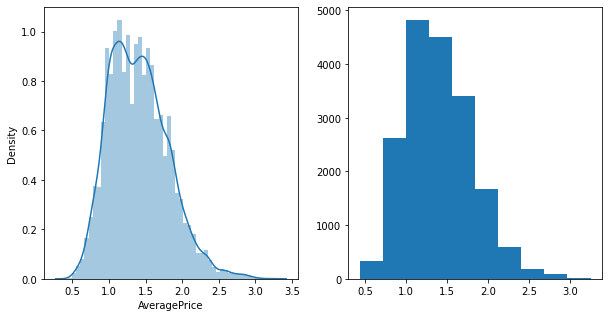

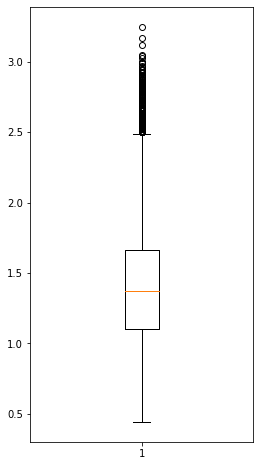

Number of upper outlier: 209
Number of lower outlier: 0
Percentage of outlier: 0.011452682338758288
---------------------------------------------------------------------------
Total Volume
count    1.824900e+04
mean     8.506440e+05
std      3.453545e+06
min      8.456000e+01
25%      1.083858e+04
50%      1.073768e+05
75%      4.329623e+05
max      6.250565e+07
Name: Total Volume, dtype: float64
median: 107376.76
mode: 0       2038.99
1       2858.31
2       3288.85
3       3529.44
4       3713.49
5       4103.97
6       7223.46
7       9465.99
8      13234.04
9      19634.24
10     46602.16
11    569349.05
Name: Total Volume, dtype: float64
Q1: 10838.58
Q3: 432962.29
IQR: 422123.70999999996
variance: 11926975521801.262
skew: 9.00768747885452 => Phân phối lệch phải
kurtosis: 92.10445777646086 => Phân phối nhọn hơn phân phối chuẩn


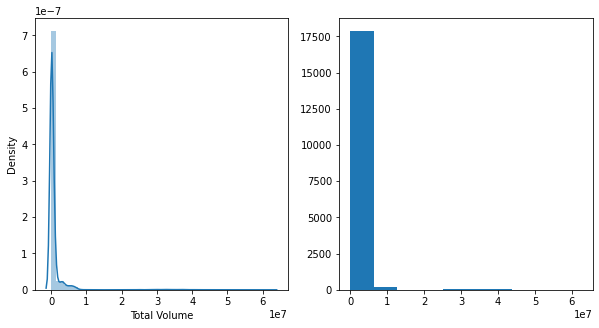

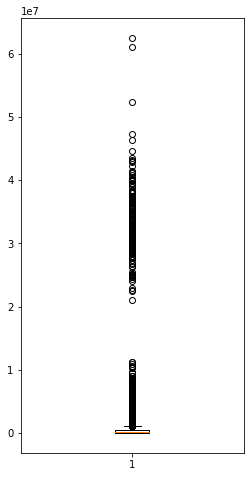

Number of upper outlier: 2297
Number of lower outlier: 0
Percentage of outlier: 0.12586991068003725
---------------------------------------------------------------------------
4046
count    1.824900e+04
mean     2.930084e+05
std      1.264989e+06
min      0.000000e+00
25%      8.540700e+02
50%      8.645300e+03
75%      1.110202e+05
max      2.274362e+07
Name: 4046, dtype: float64
median: 8645.3
mode: 0    0.0
Name: 4046, dtype: float64
Q1: 854.07
Q3: 111020.2
IQR: 110166.12999999999
variance: 1600197376979.0344
skew: 8.648219757025226 => Phân phối lệch phải
kurtosis: 86.80911256453511 => Phân phối nhọn hơn phân phối chuẩn


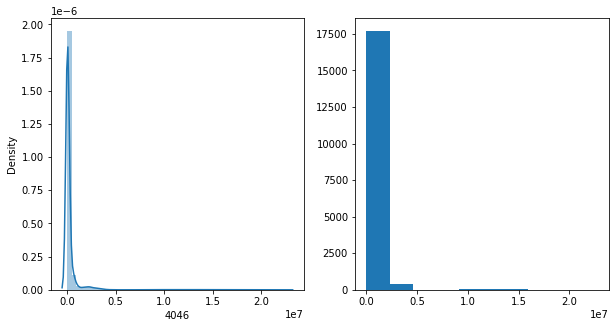

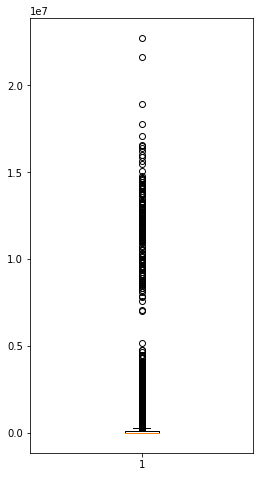

Number of upper outlier: 2518
Number of lower outlier: 0
Percentage of outlier: 0.137980163296619
---------------------------------------------------------------------------
4225
count    1.824900e+04
mean     2.951546e+05
std      1.204120e+06
min      0.000000e+00
25%      3.008780e+03
50%      2.906102e+04
75%      1.502069e+05
max      2.047057e+07
Name: 4225, dtype: float64
median: 29061.02
mode: 0    0.0
Name: 4225, dtype: float64
Q1: 3008.78
Q3: 150206.86
IQR: 147198.08
variance: 1449905940429.6353
skew: 8.942465607536276 => Phân phối lệch phải
kurtosis: 91.94902196597442 => Phân phối nhọn hơn phân phối chuẩn


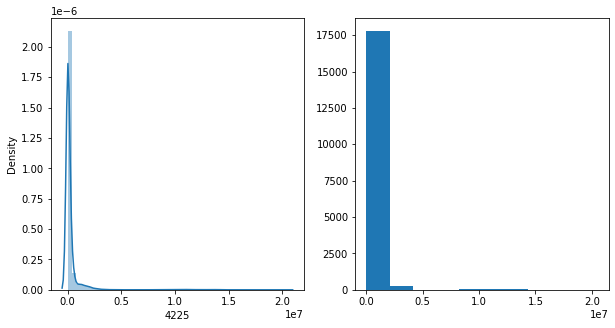

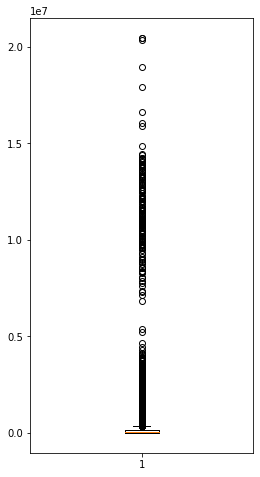

Number of upper outlier: 2519
Number of lower outlier: 0
Percentage of outlier: 0.13803496081977096
---------------------------------------------------------------------------
4770
count    1.824900e+04
mean     2.283974e+04
std      1.074641e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.849900e+02
75%      6.243420e+03
max      2.546439e+06
Name: 4770, dtype: float64
median: 184.99
mode: 0    0.0
Name: 4770, dtype: float64
Q1: 0.0
Q3: 6243.42
IQR: 6243.42
variance: 11548526004.682043
skew: 10.15939562715204 => Phân phối lệch phải
kurtosis: 132.5634408664653 => Phân phối nhọn hơn phân phối chuẩn


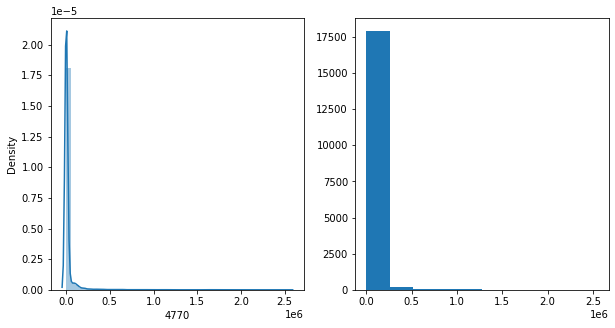

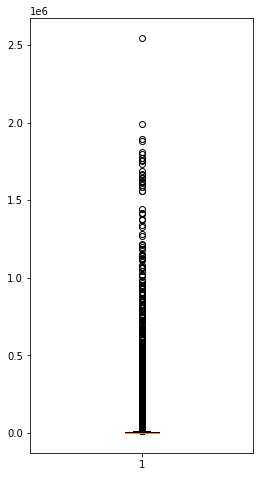

Number of upper outlier: 2918
Number of lower outlier: 0
Percentage of outlier: 0.1598991725574004
---------------------------------------------------------------------------
Total Bags
count    1.824900e+04
mean     2.396392e+05
std      9.862424e+05
min      0.000000e+00
25%      5.088640e+03
50%      3.974383e+04
75%      1.107834e+05
max      1.937313e+07
Name: Total Bags, dtype: float64
median: 39743.83
mode: 0    0.0
Name: Total Bags, dtype: float64
Q1: 5088.64
Q3: 110783.37
IQR: 105694.73
variance: 972674070012.1442
skew: 9.756071670300289 => Phân phối lệch phải
kurtosis: 112.27215647043404 => Phân phối nhọn hơn phân phối chuẩn


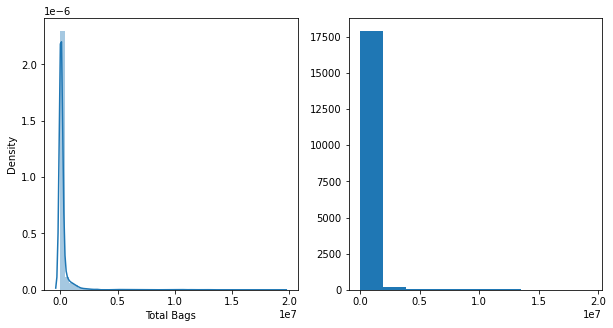

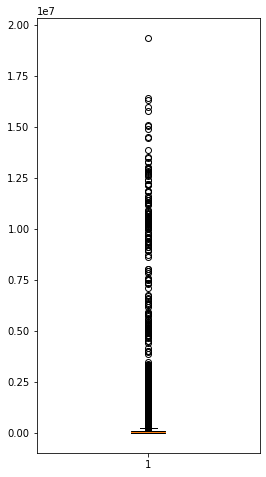

Number of upper outlier: 2533
Number of lower outlier: 0
Percentage of outlier: 0.1388021261438983
---------------------------------------------------------------------------
Small Bags
count    1.824900e+04
mean     1.821947e+05
std      7.461785e+05
min      0.000000e+00
25%      2.849420e+03
50%      2.636282e+04
75%      8.333767e+04
max      1.338459e+07
Name: Small Bags, dtype: float64
median: 26362.82
mode: 0    0.0
Name: Small Bags, dtype: float64
Q1: 2849.42
Q3: 83337.67
IQR: 80488.25
variance: 556782376190.5807
skew: 9.540659981758614 => Phân phối lệch phải
kurtosis: 107.01288512522609 => Phân phối nhọn hơn phân phối chuẩn


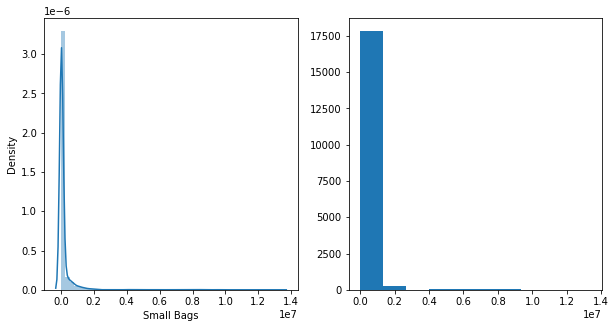

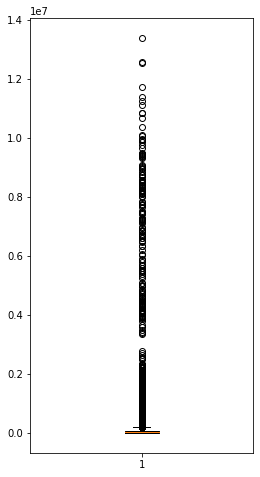

Number of upper outlier: 2407
Number of lower outlier: 0
Percentage of outlier: 0.13189763822675216
---------------------------------------------------------------------------
Large Bags
count    1.824900e+04
mean     5.433809e+04
std      2.439660e+05
min      0.000000e+00
25%      1.274700e+02
50%      2.647710e+03
75%      2.202925e+04
max      5.719097e+06
Name: Large Bags, dtype: float64
median: 2647.71
mode: 0    0.0
Name: Large Bags, dtype: float64
Q1: 127.47
Q3: 22029.25
IQR: 21901.78
variance: 59519391857.54754
skew: 9.796454598705258 => Phân phối lệch phải
kurtosis: 117.99948104584172 => Phân phối nhọn hơn phân phối chuẩn


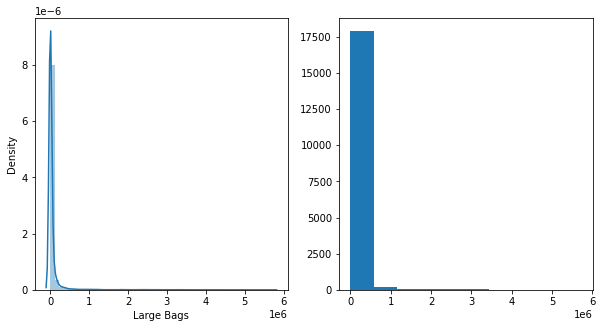

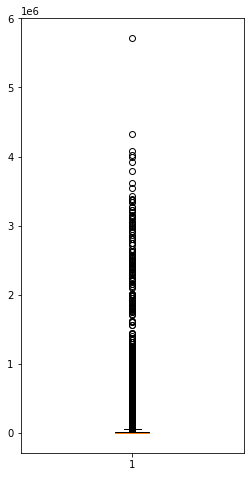

Number of upper outlier: 2707
Number of lower outlier: 0
Percentage of outlier: 0.14833689517233822
---------------------------------------------------------------------------
XLarge Bags
count     18249.000000
mean       3106.426507
std       17692.894652
min           0.000000
25%           0.000000
50%           0.000000
75%         132.500000
max      551693.650000
Name: XLarge Bags, dtype: float64
median: 0.0
mode: 0    0.0
Name: XLarge Bags, dtype: float64
Q1: 0.0
Q3: 132.5
IQR: 132.5
variance: 313038521.16381496
skew: 13.13975068600658 => Phân phối lệch phải
kurtosis: 233.60261186166983 => Phân phối nhọn hơn phân phối chuẩn


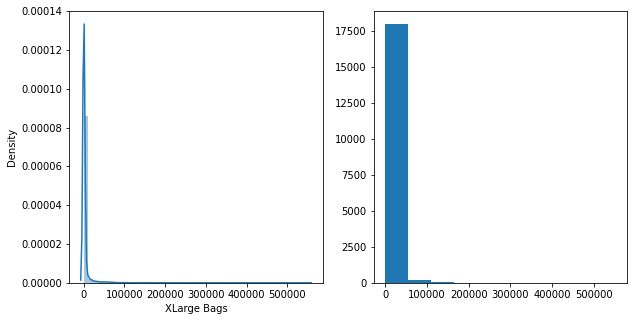

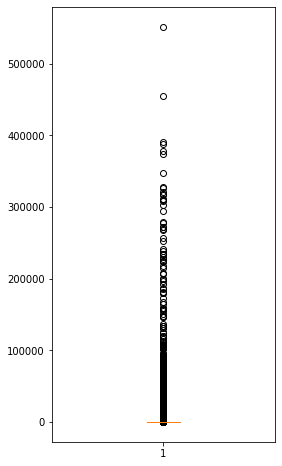

Number of upper outlier: 4014
Number of lower outlier: 0
Percentage of outlier: 0.21995725793194149
---------------------------------------------------------------------------


In [18]:
# analysis continous
for col in lst_continuous:
    print(col)
    univariate_analysis(df,col)
    his_explor(df, col)
    boxplot_explor(df, col)
    print("Number of upper outlier:",check_outlier(df, col)[0])
    print("Number of lower outlier:",check_outlier(df, col)[1])
    print("Percentage of outlier:",check_outlier(df, col)[2])
    print('-'*75)

In [19]:
lst_categories = ['type', 'region','year', 'day', 'month', 'Season']

conventional    9126
organic         9123
Name: type, dtype: int64


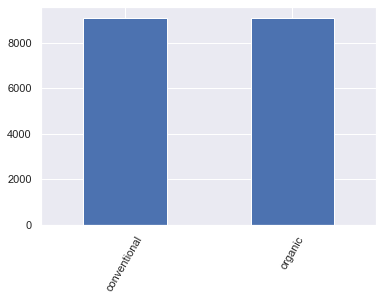

---------------------------------------------------------------------------
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
Califo

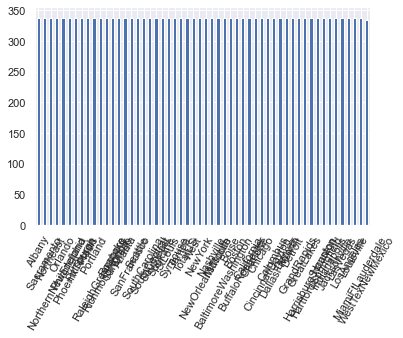

---------------------------------------------------------------------------
2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


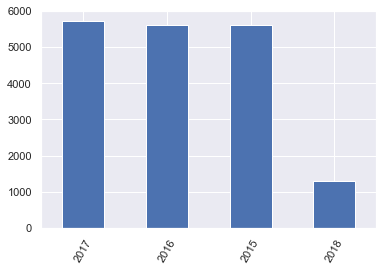

---------------------------------------------------------------------------
4     756
11    756
18    755
25    755
1     648
26    648
5     648
12    648
3     648
8     648
15    648
22    648
24    648
17    648
10    648
19    648
7     540
14    540
21    540
28    540
27    540
20    540
29    540
13    540
6     539
2     432
9     432
23    432
30    432
31    432
16    432
Name: day, dtype: int64


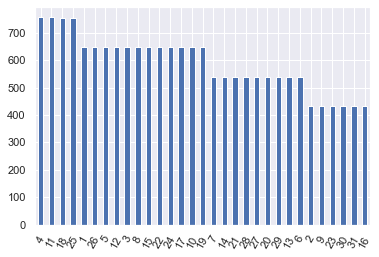

---------------------------------------------------------------------------
1     1944
3     1836
2     1728
10    1512
7     1512
5     1512
11    1404
8     1404
4     1404
12    1403
9     1296
6     1294
Name: month, dtype: int64


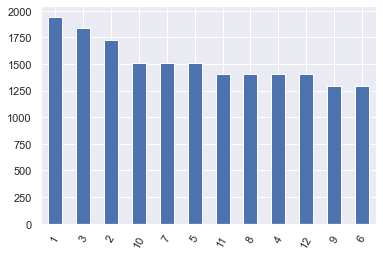

---------------------------------------------------------------------------
3    5075
0    4752
2    4212
1    4210
Name: Season, dtype: int64


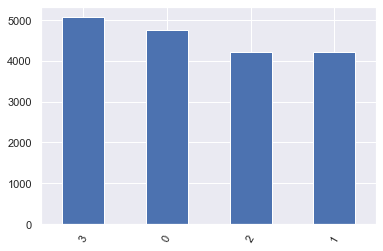

---------------------------------------------------------------------------


In [20]:
# analysis categoricals
for col in lst_categories:
    print(df[col].value_counts())
    sns.set()
    df[col].value_counts().plot.bar()
    plt.xticks(rotation=60)
    plt.show()
    print('-'*75)

In [21]:
# # corr
# sns.pairplot(df[lst_continuous].dropna())
# plt.show()

In [22]:
# corr
df[lst_continuous].corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000


In [23]:
# AveragePrice - type
df_sub = df[['type','AveragePrice']]
df_sub.columns = ['type','AveragePrice']
df_sub.head()

,type,AveragePrice
0,conventional,1.33
1,conventional,1.35
2,conventional,0.93
3,conventional,1.08
4,conventional,1.28


In [24]:
model = ols('AveragePrice ~ C(type)', data=df_sub).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(type),1122.200998,1.0,11148.793695,0.0
Residual,1836.683158,18247.0,NaN,NaN


=> type có ảnh hưởng tới AveragePrice

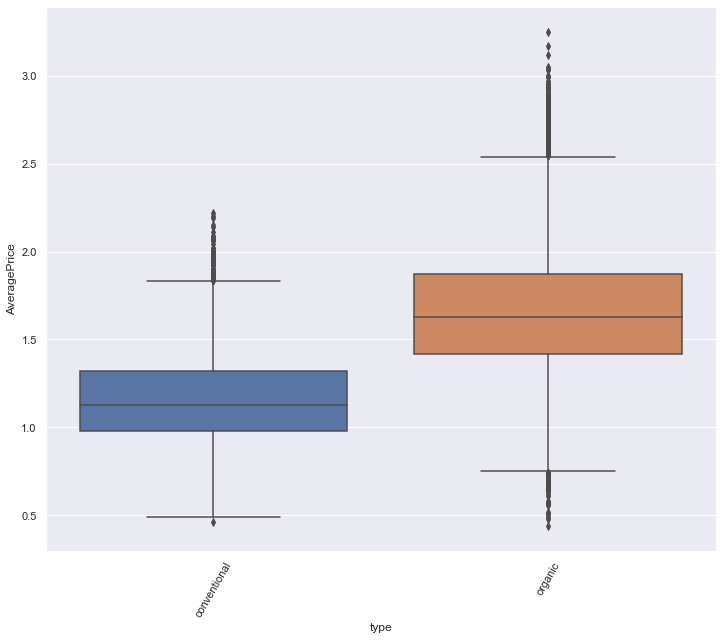

In [25]:
plt.figure(figsize=(12,10))
sns.boxplot(x='type',y='AveragePrice', data=df_sub)
plt.xticks(rotation=60)
plt.show()

In [26]:
# AveragePrice - region
df_sub = df[['region','AveragePrice']]
df_sub.columns = ['region','AveragePrice']
df_sub.head()

,region,AveragePrice
0,Albany,1.33
1,Albany,1.35
2,Albany,0.93
3,Albany,1.08
4,Albany,1.28


In [27]:
model = ols('AveragePrice ~ C(region)', data=df_sub).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(region),497.469772,53.0,69.383811,0.0
Residual,2461.414383,18195.0,NaN,NaN


=> region có ảnh hưởng tới AveragePrice

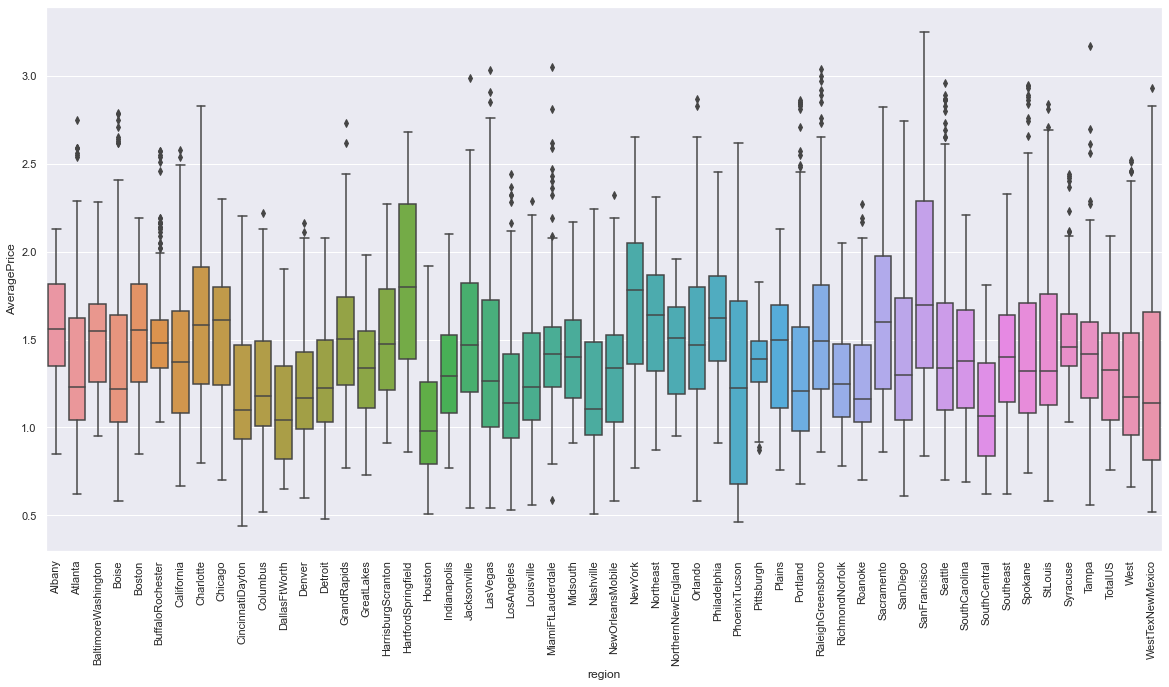

In [28]:
plt.figure(figsize=(20,10))
sns.boxplot(x='region',y='AveragePrice', data=df_sub)
plt.xticks(rotation=90)
plt.show()

In [29]:
# AveragePrice - month
df_sub = df[['month','AveragePrice']]
df_sub.columns = ['month','AveragePrice']
df_sub.head()

,month,AveragePrice
0,12,1.33
1,12,1.35
2,12,0.93
3,12,1.08
4,11,1.28


In [30]:
model = ols('AveragePrice ~ C(month)', data=df_sub).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(month),177.810716,11.0,106.000079,1.515131e-235
Residual,2781.073439,18237.0,NaN,NaN


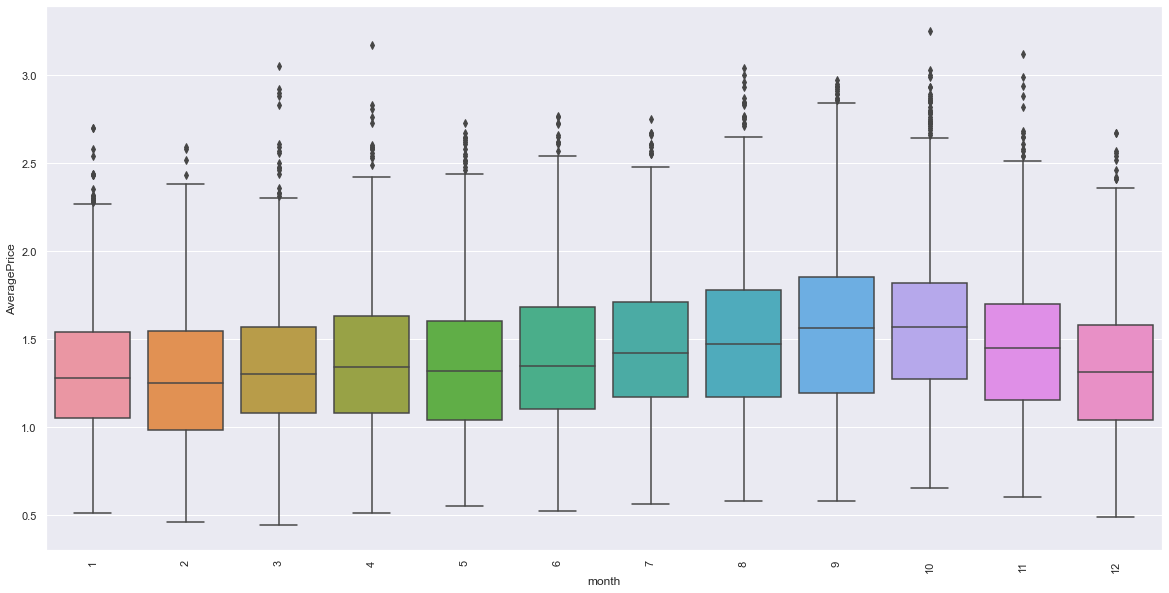

In [31]:
plt.figure(figsize=(20,10))
sns.boxplot(x='month',y='AveragePrice', data=df_sub)
plt.xticks(rotation=90)
plt.show()

In [32]:
# AveragePrice - Season
df_sub = df[['Season','AveragePrice']]
df_sub.columns = ['Season','AveragePrice']
df_sub.head()

,Season,AveragePrice
0,3,1.33
1,3,1.35
2,3,0.93
3,3,1.08
4,2,1.28


In [33]:
model = ols('AveragePrice ~ C(Season)', data=df_sub).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Season),152.809448,3.0,331.187236,2.041083e-209
Residual,2806.074707,18245.0,NaN,NaN


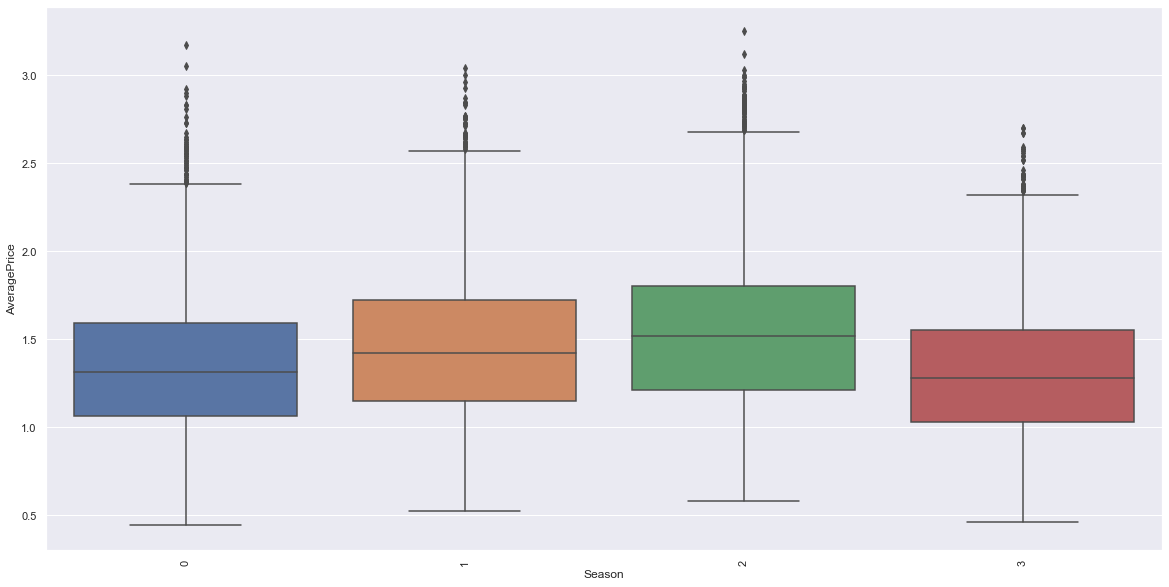

In [34]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Season',y='AveragePrice', data=df_sub)
plt.xticks(rotation=90)
plt.show()

In [35]:
# type - region
table_fb = pd.crosstab(df['type'], df['region'])
table_fb.T

type,conventional,organic
region,,
Albany,169,169
Atlanta,169,169
BaltimoreWashington,169,169
Boise,169,169
Boston,169,169
BuffaloRochester,169,169
California,169,169
Charlotte,169,169
Chicago,169,169


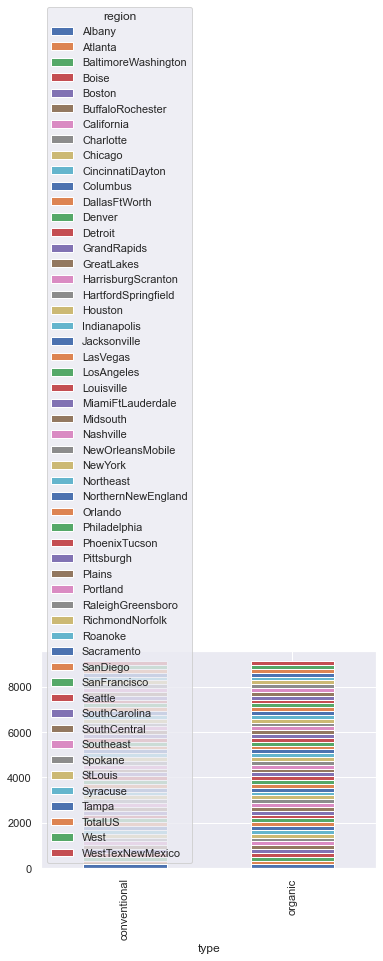

In [36]:
table_fb.plot(kind='bar', stacked=True)
plt.show()

In [37]:
# Create new dataframe with best features
df_new = df[['Total Volume', 'Total Bags', 'type', 'year', 'region', 'day', 'month','Season', 'AveragePrice']]
df_new = df_new.reset_index(drop=True)

In [38]:
X_col = ['Total Volume', 'Total Bags', 'type', 'year', 'region', 'day', 'month','Season']
X = df_new[X_col]
y = df_new['AveragePrice']

#### Outlier handling

In [39]:
# # replace outlier to median
# columns = ['Total Volume','Total Bags']
# def replace_outlier(df, col):
#     Q1 = np.quantile(df[col].dropna(),0.25)
#     Q3 = np.quantile(df[col].dropna(),0.75)
#     iqr = Q3 - Q1
#     df.loc[(df[col] > (Q3 + 1.5*iqr)) | (df[col] < (Q1 - 1.5*iqr)), col] = df[col].median()

# for col in columns:
#     replace_outlier(X, col)

### Feature Engineering

In [40]:
X.columns

Index(['Total Volume', 'Total Bags', 'type', 'year', 'region', 'day', 'month',
       'Season'],
      dtype='object')

In [41]:
# categorical data type conversion
lst_categories = ['type', 'region', 'month', 'Season']
for col in lst_categories:
    X[col] = pd.Categorical(X[col])

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Total Volume  18249 non-null  float64 
 1   Total Bags    18249 non-null  float64 
 2   type          18249 non-null  category
 3   year          18249 non-null  int64   
 4   region        18249 non-null  category
 5   day           18249 non-null  int64   
 6   month         18249 non-null  category
 7   Season        18249 non-null  category
dtypes: category(4), float64(2), int64(2)
memory usage: 644.9 KB


In [42]:
# Label Encoder for 'type'
encoder = LabelEncoder()
X['type'] = encoder.fit_transform(X['type'])

In [43]:
def dummies(x,df):
    temp = pd.get_dummies(df[x])
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

# convert categorical attribute to numeric type: get_dummies()
X = dummies('region',X)

X.shape

(18249, 61)

### Scaler

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_arr = scaler.fit_transform(X)
X = pd.DataFrame(X_arr, columns=X.columns)
X

,Total Volume,Total Bags,type,year,day,month,Season,Albany,Atlanta,BaltimoreWashington,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,-0.227716,-0.234170,-0.999836,-1.221282,1.291857,1.647632,1.279385,7.279500,-0.137372,-0.137372,...,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.136750
1,-0.230427,-0.233350,-0.999836,-1.221282,0.494231,1.647632,1.279385,7.279500,-0.137372,-0.137372,...,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.136750
2,-0.212085,-0.234730,-0.999836,-1.221282,-0.303396,1.647632,1.279385,7.279500,-0.137372,-0.137372,...,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.136750
3,-0.223444,-0.237096,-0.999836,-1.221282,-1.101022,1.647632,1.279385,7.279500,-0.137372,-0.137372,...,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.136750
4,-0.231538,-0.236718,-0.999836,-1.221282,1.519750,1.364669,0.411061,7.279500,-0.137372,-0.137372,...,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.136750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,-0.241373,-0.229301,1.000164,1.970504,-1.328915,-1.181997,1.279385,-0.137372,-0.137372,-0.137372,...,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,7.312635
18245,-0.242296,-0.233594,1.000164,1.970504,1.405803,-1.464959,1.279385,-0.137372,-0.137372,-0.137372,...,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,7.312635
18246,-0.242331,-0.233463,1.000164,1.970504,0.608177,-1.464959,1.279385,-0.137372,-0.137372,-0.137372,...,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,7.312635
18247,-0.241625,-0.231866,1.000164,1.970504,-0.189449,-1.464959,1.279385,-0.137372,-0.137372,-0.137372,...,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,7.312635


### Train / Test split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.3)

# Bước 4&5: Modeling & Evaluation/ Analyze & Report

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score, mean_squared_error

In [47]:
def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Creating estimating function

def get_metrics(model):
    r2_list = []
    rmse_list = []
    r2 = model.score(X_test, y_test)
    rmse = rmse_score(y_test, model.predict(X_test))
    r2_list.append(r2)
    rmse_list.append(rmse)
    print('Cross validation score:', cross_val_score(model, X_train, y_train, cv=5).mean())
    print('R2 score:', r2)
    print('RMSE:', rmse)

In [48]:
# Liệt kê các model sử dụng
models=[LinearRegression(), KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor(),SVR(), ExtraTreesRegressor()]
scores=[]
train_times=[]
names=[]


In [ ]:
import time
for model in models:
    start=time.time()
    scores.append(cross_val_score(model, X_train, y_train, scoring="r2", cv=10).mean())
    end=time.time()
    train_times.append(end-start)
    names.append(model.__class__.__name__)
    
df_score=pd.DataFrame(scores,columns=['Score'],index=range(len(models)))
df_score.insert(1,'Time',pd.Series(train_times))
df_score.insert(0,'Model',pd.Series(names))
df_score

 Với kết quả trên chọn Model ExtraTreesRegressor vì Score cao hơn

In [ ]:
# create new model with adjustable parameters
Etg = ExtraTreesRegressor(n_estimators=120, random_state=0).fit(X_train, y_train)

In [ ]:
# evalute
get_metrics(Etg)

In [ ]:
yhat_train = Etg.predict(X_train)
yhat_test = Etg.predict(X_test)
# Test
plt.figure(figsize=(12,10))
sns.kdeplot(y_test, color='blue', label='Actual values')
sns.kdeplot(yhat_test, color='red', label='predicted values')
plt.legend()
plt.title('True values & prediction', fontsize=20)
plt.show()

ExtraTreeRegressor gives pretty good results. However, apply some other algorithms to see if it improves model performance more

#### Build model with XGbooot

In [ ]:
# XGbooot
xgb = XGBRegressor(n_estimators=100)
xgb.fit(X_train, y_train)

get_metrics(xgb)

In [ ]:
# visualization
yhat_train = xgb.predict(X_train)
yhat_test = xgb.predict(X_test)
# Test
sns.kdeplot(y_test, color='blue', label='Actual test values')
sns.kdeplot(yhat_test, color='red', label='predicted test values')
plt.legend
plt.title('Test')
plt.show()

#### Build model with CatBoostRegressor

In [ ]:
num_data=df_new.select_dtypes(include=['int64','float64'])
num_data.head(1)

In [ ]:
cat_data=df_new.select_dtypes(include='object')
cat_data.head()

In [ ]:
df_cat=pd.merge(cat_data,num_data,left_index=True,right_index=True)
df_cat.head()

In [ ]:
x=df_cat.drop(columns='AveragePrice',axis=1)
y=df_cat['AveragePrice']

In [ ]:
cat_features=[0,1]

In [ ]:
from catboost import CatBoostRegressor
cat=CatBoostRegressor(cat_features=cat_features)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
cat.fit(x_train, y_train)

In [ ]:
y_pred = cat.predict(x_test)
y_pred

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred)

In [ ]:
mean_squared_error(y_test,y_pred)

### Choice model with ExtraTreesRegressor & Save model

In [ ]:
import pickle
# Save model
pkl_filename = 'reg_model_avocado.pkl'
with open(pkl_filename, 'wb') as file:  
    pickle.dump(Etg, file)

In [ ]:
# Load model
with open(pkl_filename, 'rb') as file:  
    reg_model = pickle.load(file)

In [ ]:
reg_model

In [ ]:
y_pred = reg_model.predict(X_test)
y_pred

In [ ]:
r2 = r2_score(y_pred, y_test)
r2

In [ ]:
mae = mean_squared_error(y_pred, y_test)
mae

In [ ]:
metrics = pd.DataFrame([{
    'Model': 'ExtraTreesRegressor',
    'r2_score': r2,
    'MAE': mae
}])
metrics

In [ ]:
metrics.to_csv('metrics_res.txt')